In [26]:
#Step 1: Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


This a Data analysis of HYGGELAND Datasets to asses their customers behaviour, identfy popular products to optimise the prices and increase the sales.  For that we need to prepare the dataset.
First import all the required libraries to do the data analysis.

Second, we extract the dataset from the "Raw" folder

In [8]:
#step 2: Load the dataset
df_full = pd.read_csv("C:/Users/Sheila/Documents/VSCODE PROJECTS/HYGGELAND PROJECT/Hyggeland-project-Data-analysis/jupyter_notebooks/Data/Inputs/Raw/Online_Retail.csv")
# Display first few rows
df_full.head()
print("\n--- Dataset Info (Full) ---")
df_full.info()


--- Dataset Info (Full) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


Third, we are going to verify there is not any error, miss data, etc.


In [9]:
# --- Step 2: Initial Data Inspection ---

print("\n--- Summary Statistics (Full) ---")
print(df_full.describe(include='all'))
print("\n--- Missing Values (Full) ---")
print(df_full.isnull().sum())



--- Summary Statistics (Full) ---
       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000

The preliminary inspection indicates that  there are 1,454 missing values which is a minimal  percentage (~0.3% of rows), regarding the CustomerID there are no missing values. Despite the low percentage we are going to drop these row, remove invalid values 

In [10]:
# Step 3: Remove missing product descriptions
df_full = df_full.dropna(subset=["Description"])

# Step 4: Remove returns or invalid values
df_full = df_full[df_full["Quantity"] > 0]
df_full = df_full[df_full["UnitPrice"] > 0]
df_full.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Now, we are going to load the new data to the "Input" folder and then we will start working with it.

In [11]:
import os
#Step 5: Export cleaned dataset
# Make sure the directory exists
os.makedirs("Data/Inputs", exist_ok=True)

# Step 6: Export to CSV
df_full.to_csv(os.path.join("Data/Inputs", "Cleaned_Online_Retail_Full.csv"), index=False)
print("✅ Cleaned data saved successfully.")
df_full.head()

✅ Cleaned data saved successfully.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


I have realised that the labels of the columns are not uniform so, I will change the labels and replace the spaces in column names with underscores.


In [12]:
# Step 7: Replace spaces in column names with underscores

# Insert underscore between lowercase and uppercase letters, then lowercase the whole string
df_full.columns = (
    df_full.columns
    .str.replace(r'(?<=[a-z])(?=[A-Z])', '_', regex=True)  # insert underscore before capital letter
    .str.lower()
)


#Step 8: confirm changes
print(df_full.columns)
df_full.head()


Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Now that the dataset is cleaned we can start doing some visualisations for our analysis. First, we will do a preliminar descriptive statistic table.

In [15]:

# Step 9: Load the cleaned dataset 
df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")

# Step 10: Create descriptive statistics table for all columns
desc_stats_all = df_full.describe(include='all')

# Step 11: Display the full descriptive statistics table
print(desc_stats_all)

#Step 12: Save the descriptive statistics table to a CSV file
desc_stats_all.to_csv("Data/Inputs/Descriptive_Statistics_All.csv", index=True)

C:\Users\Sheila\AppData\Local\Temp\ipykernel_13704\3141010679.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")


        InvoiceNo StockCode                         Description  \
count    530104.0    530104                              530104   
unique    19962.0      3922                                4026   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2265                                2323   
mean          NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   

             Quantity          InvoiceDate      UnitPrice     CustomerID  \
count   530104.000000               530104  530104.000000  530104.000000   
unique            NaN                18499 

I have realised that despite the changes I did to the labels to make them look uniform, they still appear as in the original file. This has happened maybe because I did the changes after loading the file to the inputs folder. So, we will change the labels again.

In [ ]:
# Step 13 Rename columns ex: from InvoiceDate → invoice_date
df_full.columns = (
    df_full.columns
    .str.replace(r'(?<=[a-z])(?=[A-Z])', '_', regex=True)  # insert underscores
    .str.lower()
)

# Step 14 Then save it back to CSV to preserve the change
df_full.to_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv", index=False)
df_full.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


After fixed the labels, we will explain the key observations of the descriptive statistics table.
During the preliminary inspection, in the "quantity" column there was a maximum of 80,995;some huge purchases may distort our analysis (someone ordering 80,000+ items is not normal).But since we do not know if they are mistakes or just punctual purchases we will leave them in the dataset. 
    
Also there was a minimum of -80,995. Negative values maybe mean returns or data errors. So what we did is to remove rows where Quantity <= 0 to clean the dataset and we kept only the numeric quantities >= 0. It was the same case for the "uni_price" column the minimum price was -£11,062 which clearly invalid, thus, we deleted the prices <= 0, too. (Check step 4 above) 


What we can observe is that:
 1. Quantity
    -The mean is about 9.55 items per transaction.
    -The median (50%) is only 3 items, which means most purchases are small.
 2. Unit price
    -The mean price is £4.61, but the standard deviation  is quite elevated (std): £96.76. This maybe explained because the maximum price is £38,970 which could be an outlier.
 3. Customer
    -There are no missing values now. So, I could later on customer-level analysis: frequency, loyalty, total spend, etc. Using this column o identify top customers or segment by purchasing behaviour.
 4. Country
    -There are 38 unique countries. United Kingdom accounts for 495,478 out of 541,909 transactions which we calcualted that is 91% of our data. UK is the main market.Later on, we could compare UK vs. other countries to find different trends creating visualisations of top countries by revenue or orders.    
 5. Description / StockCode / Invoice_No  
    -We observe that most sold item: "WHITE HANGING HEART T-LIGHT HOLDER" (2,369 times). So, This is our bestseller.
 6. Invoice_date
    
    -The most frequent time: 31 Oct 2011, 14:41. Later on, we could visualise trends like busiest hours, days, or months. To understand  and identify customer patterns. 



Now, we will load the cleaned dataset from the "Inputs" folder and then we will modify the Invoice_date column to be able to visualise busiest hours, days or months.


In [25]:
# Step 15: Load the cleaned dataset again
df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")

# Step 16: convert date column to datetime. 
df_full['invoice_date'] = pd.to_datetime(df_full['invoice_date'])
df_full['year'] = df_full['invoice_date'].dt.year
df_full['month'] = df_full['invoice_date'].dt.month 
df_full['day'] = df_full['invoice_date'].dt.day
df_full['day_of_week'] = df_full['invoice_date'].dt.day_name()
df_full['week_of_year'] = df_full['invoice_date'].dt.isocalendar().week
df_full['quarter'] = df_full['invoice_date'].dt.quarter
# Step 17: Save the updated dataset with new date columns
df_full.to_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv", index=False)   
df_full.head()


C:\Users\Sheila\AppData\Local\Temp\ipykernel_13704\3938876516.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year,month,day,day_of_week,week_of_year,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,Wednesday,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,Wednesday,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,48,4


Now, we will create the following primary visualisations based on the descriptive statistics table.
1. Histogram of Unit_price: It will show the price distribution of products. We will use it to detect pricing trends or outliers.

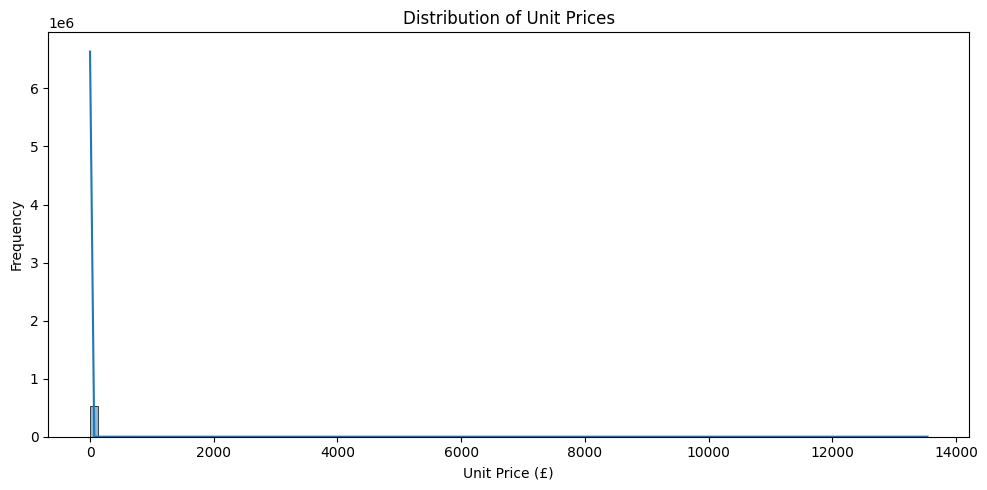

In [ ]:
# Step 18: Visualize a histogram of the unit price.
plt.figure(figsize=(10, 5))
sns.histplot(df_full['unit_price'], bins=100, kde=True)
plt.title("Distribution of Unit Prices")
plt.xlabel("Unit Price (£)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


The histogram look "strange" like a long stick probably because   the  dataset contains very high unit prices, like £38,970 and most unit prices are small (e.g., under £10), but a few massive outliers stretch the range. As a result, most of the bars are squashed into the left of the histogram. To find a solution, we will filter the data to remove extreme prices, and reduce the range of prices(bins) from 100 to 50, like this the bars are more visible.

<Axes: xlabel='unit_price', ylabel='Count'>

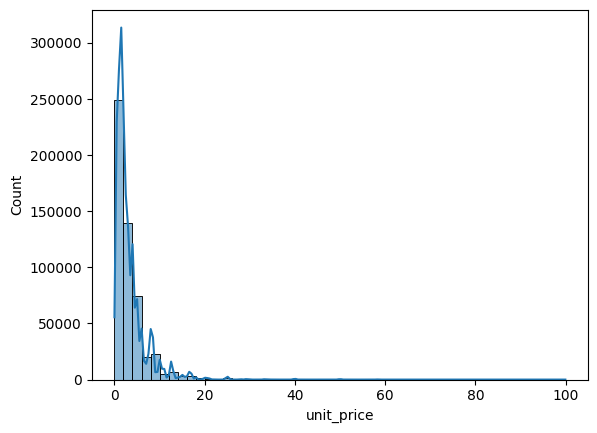

In [ ]:
# Step 19 Filter to more realistic unit prices (e.g. under £100)
filtered_df = df_full[df_full['unit_price'] < 100]

# Step 20: Plot again
sns.histplot(filtered_df['unit_price'], bins=50, kde=True)


The figure above shows a right skewed distribution which means that the majority of the prices of the product purchased are < £10. which explains why the mean price is £4.61.

2. Box plots: it will help to identify anomalies and grasp normal buying levels. It will be good for skewed data like quantities.

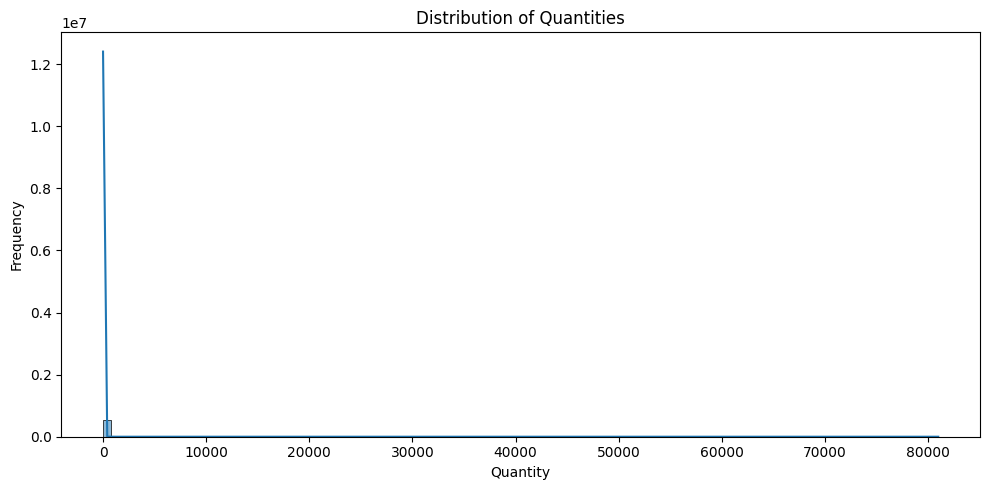

In [32]:
# Step 21: Visualize the distribution of quantities     
plt.figure(figsize=(10, 5))
sns.histplot(df_full['quantity'], bins=100, kde=True)   
plt.title("Distribution of Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


We have had the same issue as in the previous visualisation, so we will filter in this one, too, to get a more clear distribution.

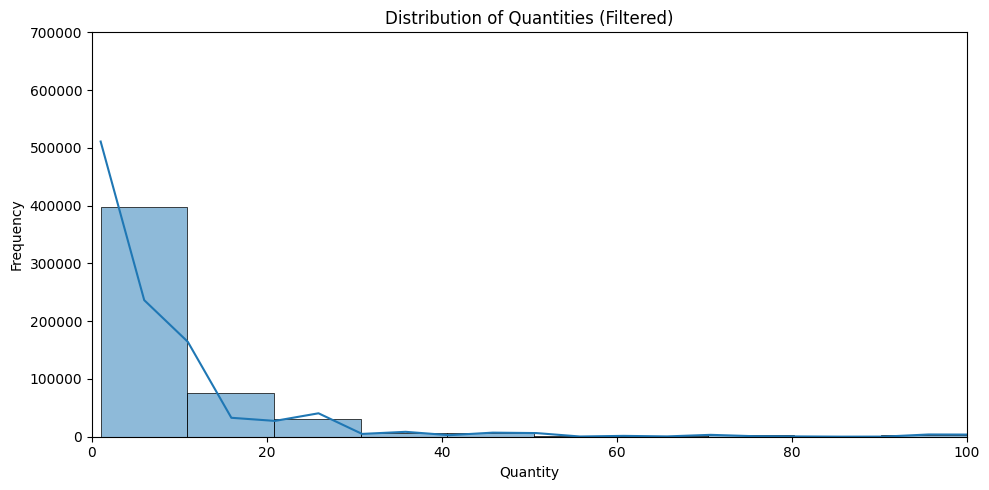

In [46]:

# Step 22: Filter to more realistic quantities (e.g. under 1000)
filtered_df = df_full[df_full['quantity'] < 1000]
# Step 23: Plot again
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['quantity'], bins=100, kde=True)
plt.title("Distribution of Quantities (Filtered)")
plt.xlabel("Quantity")
plt.xlim(0, 100) # Set x-axis limit to 20
plt.ylabel("Frequency")
plt.ylim(0, 700000) # Set y-axis limit to 700000 
plt.tight_layout()
plt.show()

Also, in this case the distribution is right skewed which explains that the average of purchases was 9.55 items per customer and the median was 3 items per purchase.

3. Bar charts: They are suitable for categorical data like in our dataset. This will show which products are our bestsellers.

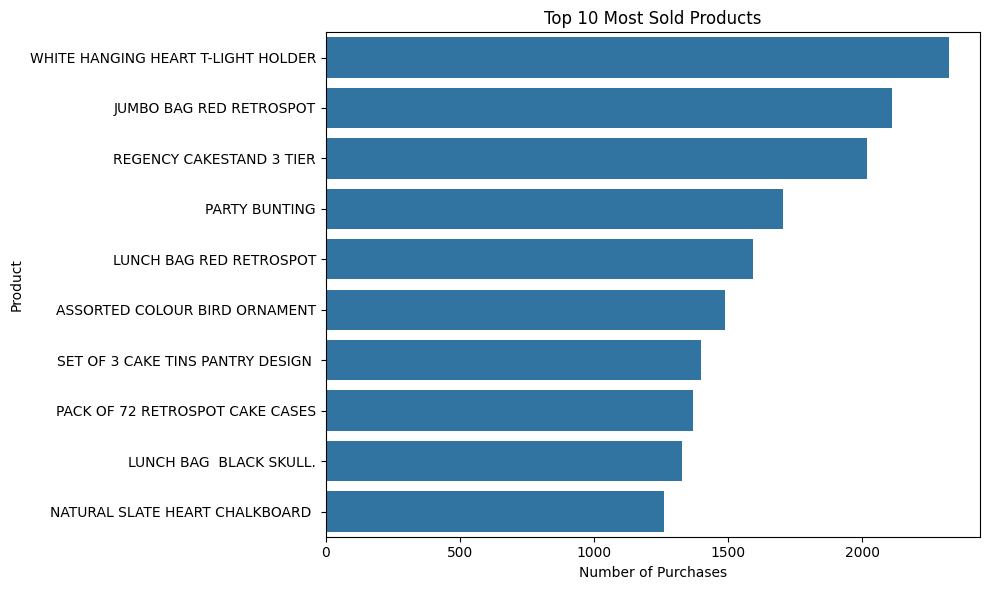

In [47]:
# Step 24: Visualise a Bar Chart of  the top 10 most sold products
top_products = df_full['description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Sold Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product")
plt.tight_layout()
plt.show()
